In [1]:
import re

input_file = "input_files/day_08.txt"

with open(input_file) as lines:
    directions = next(lines).strip()
    next(lines)
    
    graph = {} 
    for line in lines:
        node_id, l , r  = re.findall(r'\w+', line)
        graph[node_id] = {'L':l, 'R':r}

graph['AAA'], graph['ZZZ']

({'L': 'QXT', 'R': 'CDL'}, {'L': 'CDL', 'R': 'QXT'})

# Part 1

In [2]:
from itertools import cycle

directions = cycle(directions)

current = 'AAA'
count = 0

while current != 'ZZZ':
    current = graph[current][next(directions)]
    count += 1
    
count

20221

# Part 2

It's not clear to me that the directions indicate this solution has to work, but an quick analysis of the numbers (below) suggests the paths ending in 'Z' are cyclical. 

In [3]:
from math import lcm

nodes = [n for n in  graph.keys() if n.endswith('A')]

def get_length(current, directions):
    directions = cycle(directions)
    count = 0
    while not current.endswith('Z'):
        current = graph[current][next(directions)]
        count += 1

    return count

lengths = [get_length(n, directions) for n in nodes]

# find least common multiple of the lengths
lcm(*lengths)

14616363770447

## Are the path lengths cyclical?
It looks like they probably are. The nodes ending in 'Z' appear to happen at regular intervals. The cycle lengths are all the product of 277 and another prime.

In [5]:
from math import gcd

def get_n_lengths(current, directions, samples):
    '''
    Run the paths until we get a sample of lengths between
    four nodes endins in 'Z'
    '''
    directions = cycle(directions)
    count = 0
    cycle_counts = []
    while len(cycle_counts) < samples:
        current = graph[current][next(directions)]
        count += 1
        if current.endswith('Z'):
            cycle_counts.append(count)
    return cycle_counts

print("GFC:", gcd(*lengths))

for n in nodes:
    counts = get_n_lengths(n, directions, 5)
    print("=" * 60)
    print("Counts:", counts)
    print("Differences:", [b - a for a, b in zip(counts, counts[1:])])
    print("divided by 277:", counts[0] / 277)


GFC: 277
Counts: [20221, 40442, 60663, 80884, 101105]
Differences: [20221, 20221, 20221, 20221]
divided by 277: 73.0
Counts: [13019, 26038, 39057, 52076, 65095]
Differences: [13019, 13019, 13019, 13019]
divided by 277: 47.0
Counts: [19667, 39334, 59001, 78668, 98335]
Differences: [19667, 19667, 19667, 19667]
divided by 277: 71.0
Counts: [14681, 29362, 44043, 58724, 73405]
Differences: [14681, 14681, 14681, 14681]
divided by 277: 53.0
Counts: [18559, 37118, 55677, 74236, 92795]
Differences: [18559, 18559, 18559, 18559]
divided by 277: 67.0
Counts: [16897, 33794, 50691, 67588, 84485]
Differences: [16897, 16897, 16897, 16897]
divided by 277: 61.0


### Looking at the graph without regard to direction

Nodes ending with 'A' are colored red, those ending in 'Z' are colored green. The 'A' nodes serve as an onramp to the cycle.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

directions = cycle(directions)

for k, v in graph.items():
    G.add_edge(k, v['R'])
    G.add_edge(k, v['L'])
    

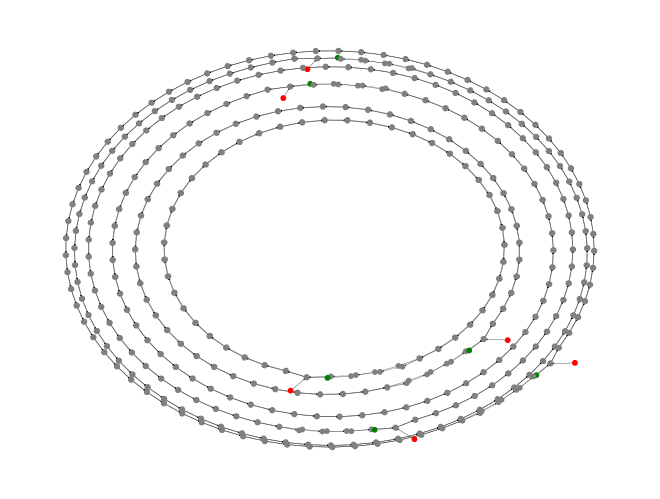

In [7]:
def getcolor(node):
    if node.endswith('A'):
        return 'red'
    elif node.endswith('Z'):
        return 'green'
    else:
        return 'gray'
    
color_map = [getcolor(node) for node in G]

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_color=color_map, node_size=10, arrowsize=2, width=.125)


### Cycle lengths related to z cycles
This is the origin of the prime factors in the cycle lengths observered above and provides another way to calculate the answer.

In [14]:
znodes = [n for n in  graph.keys() if n.endswith('Z')]

m = 1
for node in znodes:
    l = len(nx.find_cycle(G, node))
    m *= l
    print(l, l * 277)

print("part 2:", m * 277)

71 19667
73 20221
47 13019
61 16897
53 14681
67 18559
part 2: 14616363770447
